# **[Chapter 02]**  
**┗ Bearing failure Anomaly Detection**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「Data 전처리 및 EDA」
* 🥈Session 2 - 「시계열 데이터 특성 추출」
* 🥇Session 3 - 「이상 탐지 모델링」

## **문제상황 및 데이터 살펴보기**
---
> **시나리오** 🚥


A사는 냉장고를 생산하는 업체이다. 냉장고 제작 공정은 컨베이어 벨트 방식으로 제작이 되며, 하나의 공정이 중단될 시 모든 공정이 All stop되는 특성을 가진다.  
냉장고를 제작하는데 있어 주요 공정인 A 설비는 Bearing을 핵심 부품으로 사용한다. Bearing은 사용할 수록 마모가 되어 주기적으로 변경을 해줘야하는  
부품 특성을 가지고 있다. A사는 Bearing이 파손되기 이전에 이상점을 감지하여 사전 유지보수를 통해 All stop을 사전에 방지하고자 한다.

> **데이터 살펴보기**

* Bearing Sensor data
* 데이터 명세 ⬇ 

|Column|Description|
|:---|:---|
|index|측정 시간 Index|
|Bearing 1|베어링 1 진동 센서 값|
|Bearing 2|베어링 2 진동 센서 값|
|Bearing 3|베어링 3 진동 센서 값|
|Bearing 4|베어링 4 진동 센서 값|


## **문제해결 프로세스 정의**
---
> **문제정의**

▶ 냉장고 공정 주요 설비 A의 고장이 발생하면 Line All stop 리스크<br>
▶ A 설비의 핵심 부품인 Bearing 마모에 따른 설비 고장<br>


> **기대효과**


▶ 설비고장 사전에 방지하여, Line stop 방지<br>
▶ Line stop으로 인한 점검 시감 및 비용 절감<br>
▶ 계획 대비 생산량 달성


> **해결방안**


▶ Bearing Sensor data 이상 탐지를 통해 사전고장발생 방지<br>
▶ Session 1 🥉<br>
 - Data 전처리 및 EDA<br>
▶ Session 2 🥈<br>
 - 시계열 데이터 특성을 추출<br>
▶ Session 3 🥇<br>
 - 이상 탐지 모델링 수행<br>


> **성과측정**  


▶ 모델 활용 전/후 Line stop 횟수 비교<br>
▶ 모델 활용 전/후 계획 대비 생산률 비교<br>


> **현업적용**  




▶ Bearing Sensor Data 실시간 수집 체계 구축<br>
▶ Model에 Input할 window time 결정<br>
▶ Sensor Data Model Input 및 Anomaly Detection<br>
▶ Anomaly Points 발견 시 유휴시간 장비 점검<br>


> **주요 코드 미리 살펴보기**  


▶ Session 1 → pd.to_datetime(), set_index(), df.index.name=''<br>
▶ Session 2 → x.year, x.month, x.day..., sns.boxplot(), .shift(1), rolling(window=3).mean() <br>
▶ Session 3 → StandardScaler(), PCA(), make_pipeline(scaler,pca)<br>


## **🥉Session 1**  
**┗ Data 전처리 및 EDA**  
---

### · Data 전처리  
---

In [1]:
# ▶ data folder read
import numpy as np
import pandas as pd
import os

data_dir = "C:/Users/JunYeong.DESKTOP-IOMT4HU/Desktop/이상치탐지-패캠/Step 3. 다양한 산업 도메인에서의 실전 이상탐지 실습/Chapter 02. Bearing failure Anomaly Detection/chapter02_df"
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = pd.concat([merged_data,dataset_mean_abs], axis = 0)
    
merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004.02.14.07.52.39,0.061517,0.074748,0.076313,0.044901
2004.02.14.08.12.39,0.061497,0.074625,0.078987,0.044157
2004.02.14.08.32.39,0.062092,0.074997,0.077796,0.044119
2004.02.14.08.42.39,0.060523,0.074629,0.075942,0.043777
2004.02.14.08.52.39,0.061782,0.074488,0.076529,0.044127


In [2]:
# ▶ data folder read
import numpy as np
import pandas as pd
import os

data_dir = "C:/Users/JunYeong.DESKTOP-IOMT4HU/Desktop/이상치탐지-패캠/Step 3. 다양한 산업 도메인에서의 실전 이상탐지 실습/Chapter 02. Bearing failure Anomaly Detection/chapter02_df"
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = pd.concat([merged_data,dataset_mean_abs], axis = 0)
    
merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004.02.14.07.52.39,0.061517,0.074748,0.076313,0.044901
2004.02.14.08.12.39,0.061497,0.074625,0.078987,0.044157
2004.02.14.08.32.39,0.062092,0.074997,0.077796,0.044119
2004.02.14.08.42.39,0.060523,0.074629,0.075942,0.043777
2004.02.14.08.52.39,0.061782,0.074488,0.076529,0.044127


In [14]:
# ▶ date index 시간형태 변환
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('Averaged_BearingTest_Dataset.csv')
print("Dataset shape:", merged_data.shape)
merged_data.head()

Dataset shape: (560, 4)


,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-14 07:52:39,0.061517,0.074748,0.076313,0.044901
2004-02-14 08:12:39,0.061497,0.074625,0.078987,0.044157
2004-02-14 08:32:39,0.062092,0.074997,0.077796,0.044119
2004-02-14 08:42:39,0.060523,0.074629,0.075942,0.043777
2004-02-14 08:52:39,0.061782,0.074488,0.076529,0.044127


In [15]:
# ▶ pd.set option
import pandas as pd 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)  

# ▶ Data read
df = pd.read_csv("Averaged_BearingTest_Dataset.csv")
df.head()

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,2004-02-14 07:52:39,0.061517,0.074748,0.076313,0.044901
1,2004-02-14 08:12:39,0.061497,0.074625,0.078987,0.044157
2,2004-02-14 08:32:39,0.062092,0.074997,0.077796,0.044119
3,2004-02-14 08:42:39,0.060523,0.074629,0.075942,0.043777
4,2004-02-14 08:52:39,0.061782,0.074488,0.076529,0.044127


In [16]:
df.columns = ['time', 'Bearing1',	'Bearing2'	,'Bearing3',	'Bearing4']
df.head()

,time,Bearing1,Bearing2,Bearing3,Bearing4
0,2004-02-14 07:52:39,0.061517,0.074748,0.076313,0.044901
1,2004-02-14 08:12:39,0.061497,0.074625,0.078987,0.044157
2,2004-02-14 08:32:39,0.062092,0.074997,0.077796,0.044119
3,2004-02-14 08:42:39,0.060523,0.074629,0.075942,0.043777
4,2004-02-14 08:52:39,0.061782,0.074488,0.076529,0.044127


In [17]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      560 non-null    object 
 1   Bearing1  560 non-null    float64
 2   Bearing2  560 non-null    float64
 3   Bearing3  560 non-null    float64
 4   Bearing4  560 non-null    float64
dtypes: float64(4), object(1)
memory usage: 22.0+ KB


In [18]:
# ▶ Null 값 확인
print(df.isnull().sum())

time        0
Bearing1    0
Bearing2    0
Bearing3    0
Bearing4    0
dtype: int64


In [19]:
# ▶ Outlier 확인
df.describe()

,Bearing1,Bearing2,Bearing3,Bearing4
count,560.000000,560.000000,560.000000,560.000000
mean,0.073793,0.075237,0.077556,0.045765
std,0.016416,0.002347,0.002090,0.002613
min,0.058293,0.072106,0.073828,0.042777
25%,0.061055,0.073903,0.076320,0.044014
50%,0.068660,0.074488,0.077198,0.044612
75%,0.080960,0.075803,0.078300,0.046794
max,0.121052,0.089184,0.090852,0.056617


### · Data EDA
---
* 데이터 특성 파악을 위한 초기 탐색

In [20]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time',inplace=True)
# ▶ Index name 변경
df.index.name=''

In [24]:
# ▶ 전체 Data 기간 확인
print(df)
df.index.min(), df.index.max()

                     Bearing1  Bearing2  Bearing3  Bearing4
                                                           
2004-02-14 07:52:39  0.061517  0.074748  0.076313  0.044901
2004-02-14 08:12:39  0.061497  0.074625  0.078987  0.044157
2004-02-14 08:32:39  0.062092  0.074997  0.077796  0.044119
2004-02-14 08:42:39  0.060523  0.074629  0.075942  0.043777
2004-02-14 08:52:39  0.061782  0.074488  0.076529  0.044127
...                       ...       ...       ...       ...
2004-02-18 15:02:39  0.105560  0.085828  0.087953  0.053688
2004-02-18 15:12:39  0.101248  0.087511  0.089259  0.055313
2004-02-18 15:22:39  0.098987  0.088471  0.090073  0.054719
2004-02-18 15:32:39  0.095559  0.086469  0.088816  0.055151
2004-02-18 15:42:39  0.094821  0.089184  0.090852  0.054423

[560 rows x 4 columns]


(Timestamp('2004-02-14 07:52:39'), Timestamp('2004-02-18 15:42:39'))

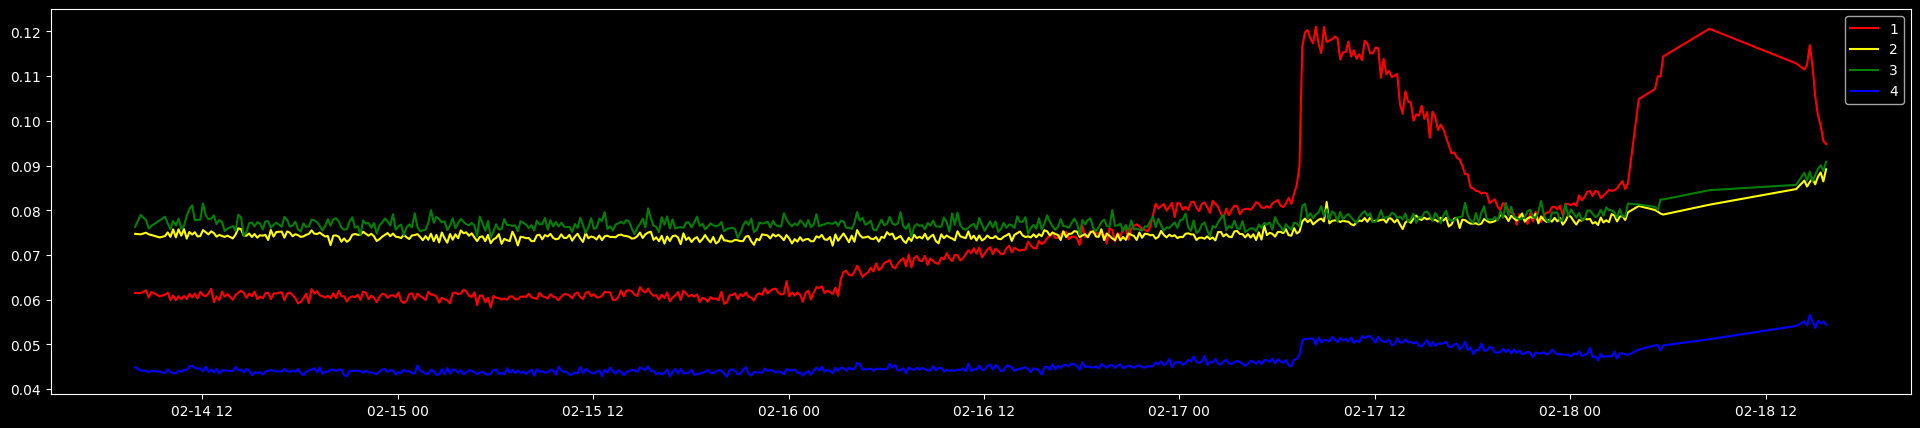

In [23]:
# ▶ Plotting 전체 데이터 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

plt.figure(figsize=(24,5))
plt.plot(df.index, df['Bearing1'], linestyle='-', color='red', label='1');
plt.plot(df.index, df['Bearing2'], linestyle='-', color='yellow', label='2');
plt.plot(df.index, df['Bearing3'], linestyle='-', color='green', label='3');
plt.plot(df.index, df['Bearing4'], linestyle='-', color='blue', label='4');
plt.legend();

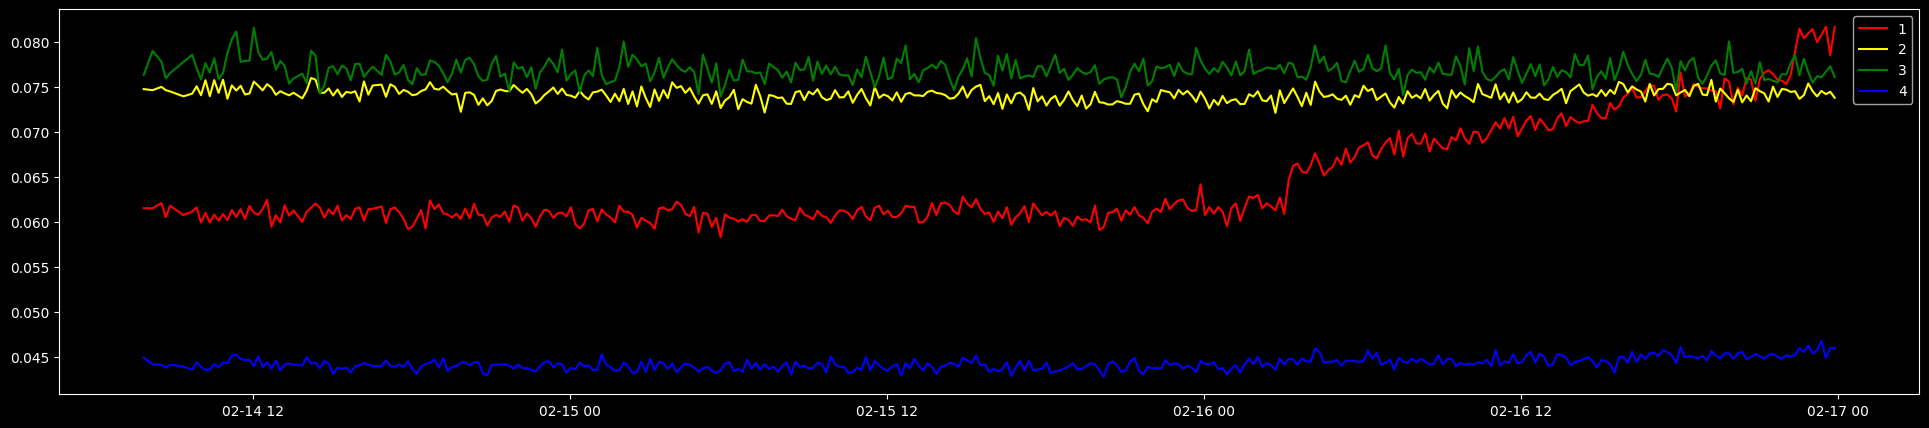

In [26]:
# ▶ Before Data 기간 확인
df_before = df[:'2004-02-17 00:00:00']

plt.figure(figsize=(24,5))
plt.plot(df_before.index, df_before['Bearing1'], linestyle='-', color='red', label='1');
plt.plot(df_before.index, df_before['Bearing2'], linestyle='-', color='yellow', label='2');
plt.plot(df_before.index, df_before['Bearing3'], linestyle='-', color='green', label='3');
plt.plot(df_before.index, df_before['Bearing4'], linestyle='-', color='blue', label='4');
plt.legend();

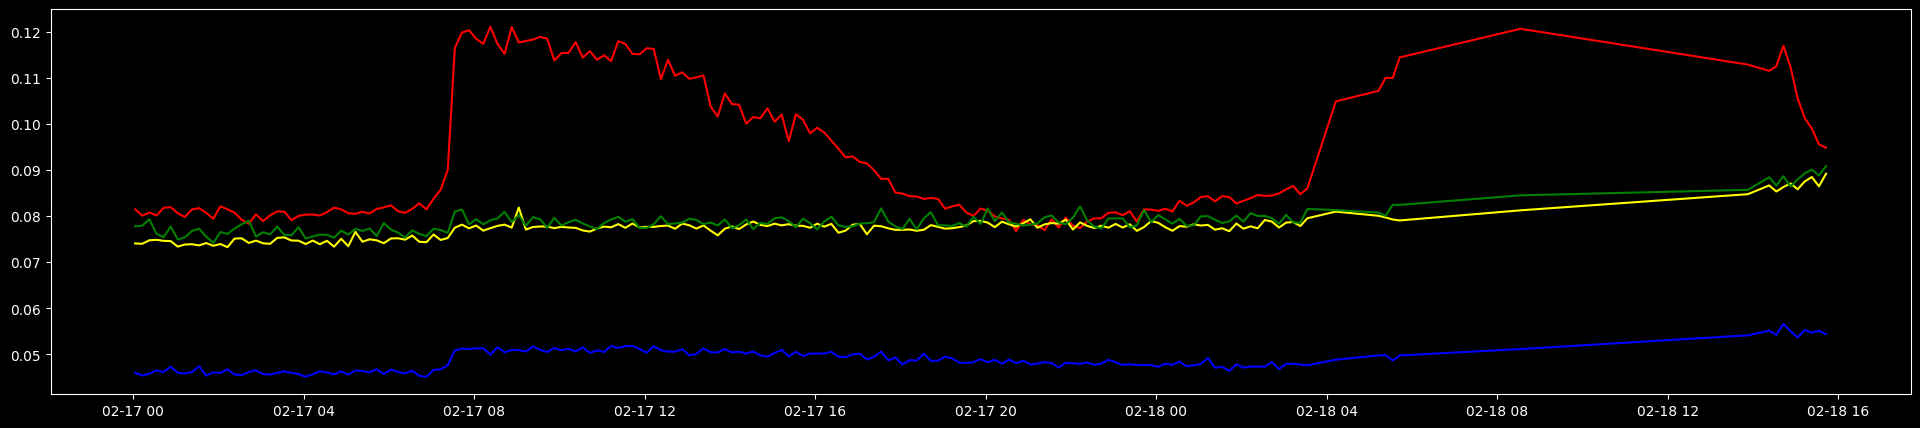

In [27]:
# ▶ After Data 기간 확인
df_after = df['2004-02-17 00:00:00':]

plt.figure(figsize=(24,5))
plt.plot(df_after.index, df_after['Bearing1'], linestyle='-', color='red', label='1');
plt.plot(df_after.index, df_after['Bearing2'], linestyle='-', color='yellow', label='2');
plt.plot(df_after.index, df_after['Bearing3'], linestyle='-', color='green', label='3');
plt.plot(df_after.index, df_after['Bearing4'], linestyle='-', color='blue', label='4');

C:\Users\JunYeong.DESKTOP-IOMT4HU\AppData\Local\Temp\ipykernel_30920\665884667.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bearing1'])


<Axes: xlabel='Bearing1', ylabel='Density'>

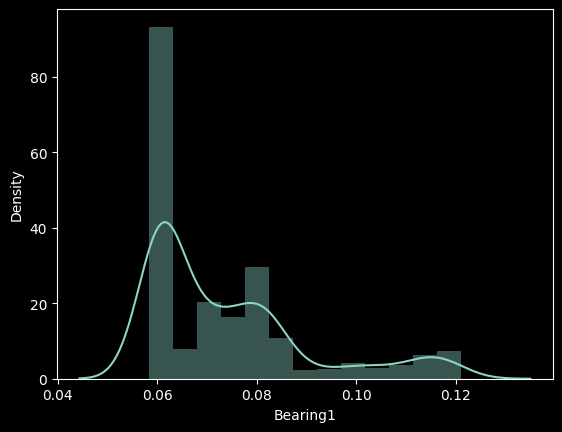

In [28]:
sns.distplot(df['Bearing1'])

## **🥈Session 2**  
**┗ 시계열 데이터 특성 추출**  
---


In [30]:
# ▶ 년, 월, 요일, 시간
# [참조] x.year, x.month, x.day, x.hour, x.minute, x.second, x.microsecond, x.weekday()
df['year'] = df.index.year
df['month'] = df.index.month
df['weekday']= df.index.weekday
df['hour']= df.index.hour
df['date'] = df.index.date
df.head()

,Bearing1,Bearing2,Bearing3,Bearing4,year,month,weekday,hour,date
,,,,,,,,,
2004-02-14 07:52:39,0.061517,0.074748,0.076313,0.044901,2004,2,5,7,2004-02-14
2004-02-14 08:12:39,0.061497,0.074625,0.078987,0.044157,2004,2,5,8,2004-02-14
2004-02-14 08:32:39,0.062092,0.074997,0.077796,0.044119,2004,2,5,8,2004-02-14
2004-02-14 08:42:39,0.060523,0.074629,0.075942,0.043777,2004,2,5,8,2004-02-14
2004-02-14 08:52:39,0.061782,0.074488,0.076529,0.044127,2004,2,5,8,2004-02-14


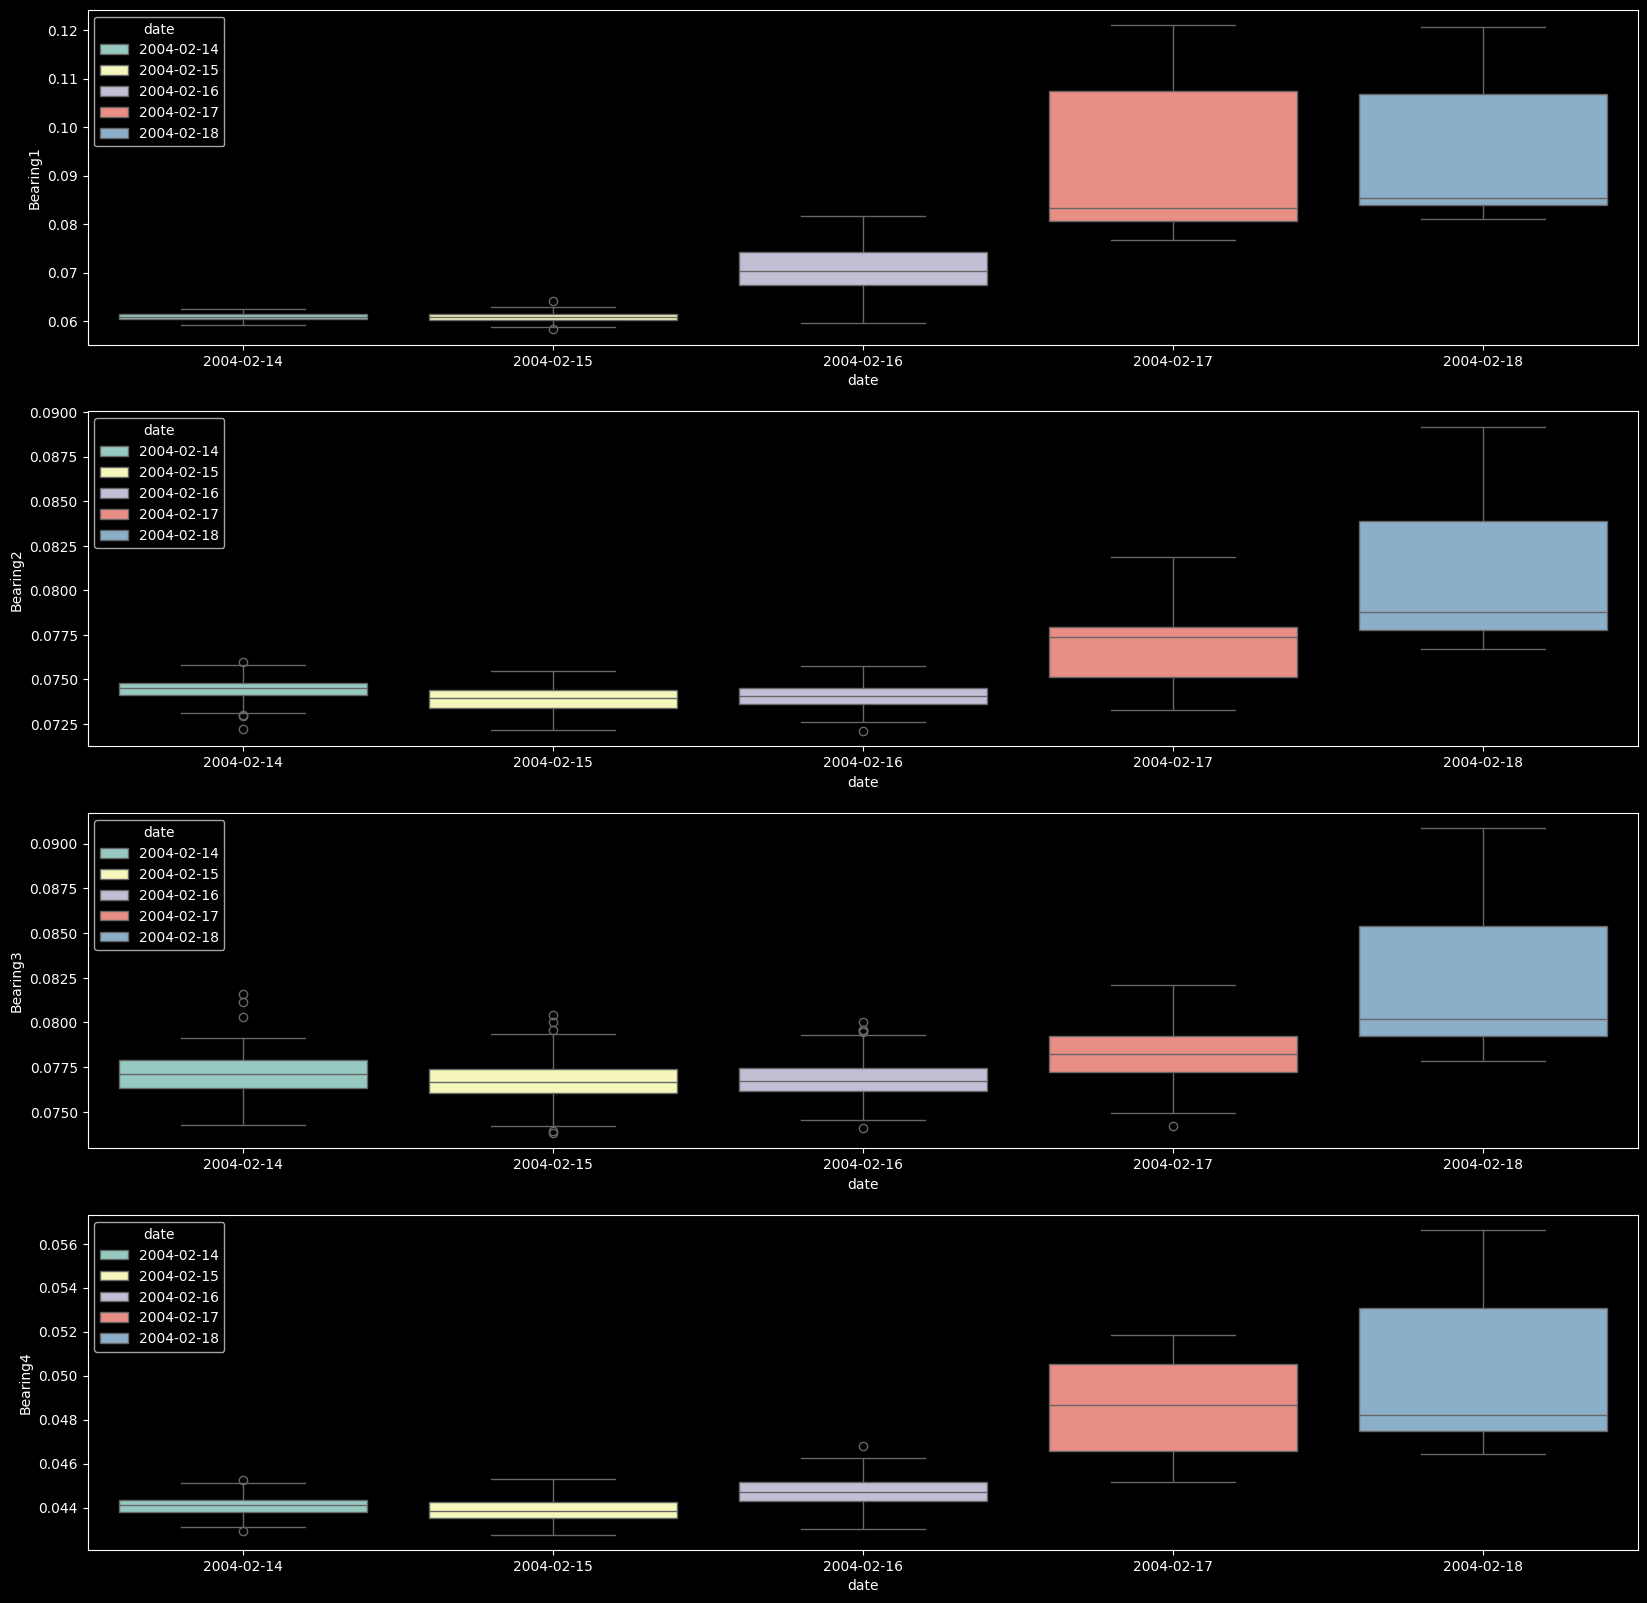

In [34]:
# ▶ Box plot 활용 일 별 Bearing 분포 확인
col_n = 1
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(df.columns[0:4]):
    sns.boxplot(x='date', y=col, data= df, ax=ax[int(i%row_n)], hue='date')

### · lag(지연) 데이터 생성

In [36]:
# ▶ shift 명령어 사용 , lag 데이터 생성
df['Bearing1_lag'] = df['Bearing1'].shift(1, fill_value=df['Bearing1'][0])
df[['Bearing1', 'Bearing1_lag']]

,Bearing1,Bearing1_lag
,,
2004-02-14 07:52:39,0.061517,0.061517
2004-02-14 08:12:39,0.061497,0.061517
2004-02-14 08:32:39,0.062092,0.061497
2004-02-14 08:42:39,0.060523,0.062092
2004-02-14 08:52:39,0.061782,0.060523
...,...,...
2004-02-18 15:02:39,0.105560,0.112345
2004-02-18 15:12:39,0.101248,0.105560
2004-02-18 15:22:39,0.098987,0.101248


### · 이동 평균(Rolling window)

In [38]:
# ▶ rolling 명령어 사용 이동 평균 생성
df['bearing1_ma_3'] = df['Bearing1'].rolling(window=3).mean()
df['bearing1_ma_3'].fillna(df['Bearing1'], inplace=True)
df[['Bearing1', 'bearing1_ma_3']]

,Bearing1,bearing1_ma_3
,,
2004-02-14 07:52:39,0.061517,0.061517
2004-02-14 08:12:39,0.061497,0.061497
2004-02-14 08:32:39,0.062092,0.061702
2004-02-14 08:42:39,0.060523,0.061371
2004-02-14 08:52:39,0.061782,0.061466
...,...,...
2004-02-18 15:02:39,0.105560,0.111613
2004-02-18 15:12:39,0.101248,0.106384
2004-02-18 15:22:39,0.098987,0.101932


## **🥇Session 3**  
**┗ 이상 탐지 모델링**  
---

#### PCA
##### · 차원축소 및 변수 설명력 확인
---

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

df = df[['Bearing1', 'Bearing2', 'Bearing3', 'Bearing4', 'Bearing1_lag' ,'bearing1_ma_3']]


# ▶ Create scaler: scaler
scaler = StandardScaler()

# ▶ Create a PCA instance: pca
pca = PCA()

# ▶ Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

pipeline.fit(df)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [40]:
# ▶ pca.n_components_(차원 축소 주성분 개수)
features = range(pca.n_components_)
feature_df=pd.DataFrame(data=features,columns=['pc_feature'])

# ▶ pca.explained_variance_ratio_(설명력)
variance_df=pd.DataFrame(data=pca.explained_variance_ratio_,columns=['variance'])
pc_feature_df=pd.concat([feature_df,variance_df],axis=1)
pc_feature_df

# ▶ PC0, PC1으로도 전체 분산에 95% 이상 설명 가능

,pc_feature,variance
0,0,0.829349
1,1,0.138214
2,2,0.023362
3,3,0.007495
4,4,0.001392
5,5,0.000188


### · 시각화 및 Threshold 선정
---

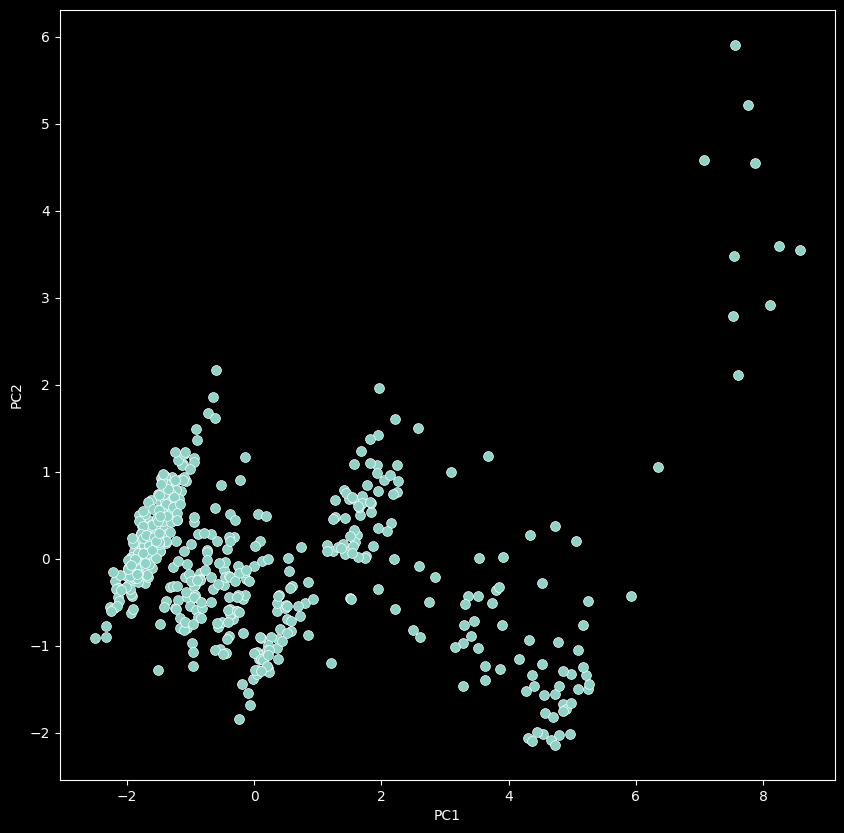

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

# ▶ 정규화
X_ = StandardScaler().fit_transform(df)

# ▶ 2개의 주성분으로 차원 축소
pca = PCA(n_components=2)
pc = pca.fit_transform(X_)

pc_df=pd.DataFrame(pc,columns=['PC1', 'PC2']).reset_index(drop=True)

plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot(data=pc_df,x='PC1',y='PC2', legend='brief', s=50, linewidth=0.5);

# ▶ 각 클러스터 중심에서 멀리 떨어진 Data 일 수록 이상치

In [57]:
# ▶ np.where 활용 if문 
import numpy as np
pc_df['abnormal'] = np.where( (pc_df['PC1']>-2) & (pc_df['PC1']<2) & (pc_df['PC2']>-1.5) & (pc_df['PC2']<1), 0, 1)
pc_df.head(5)

,PC1,PC2,abnormal
,,,
2004-02-14 07:52:39,-1.378273,0.180923,0
2004-02-14 08:12:39,-1.112753,1.084506,1
2004-02-14 08:32:39,-1.220125,0.726634,0
2004-02-14 08:42:39,-1.658874,0.043568,0
2004-02-14 08:52:39,-1.539146,0.223650,0


In [58]:
pc_df['abnormal'].value_counts()

abnormal
0    428
1    132
Name: count, dtype: int64

In [59]:
# ▶ 기존 Data의 index를 부여
pc_df.index = df.index
pc_df.head()

,PC1,PC2,abnormal
,,,
2004-02-14 07:52:39,-1.378273,0.180923,0
2004-02-14 08:12:39,-1.112753,1.084506,1
2004-02-14 08:32:39,-1.220125,0.726634,0
2004-02-14 08:42:39,-1.658874,0.043568,0
2004-02-14 08:52:39,-1.539146,0.223650,0


In [60]:
# ▶ 기존 data와 Concat
df_concat = pd.concat([df, pc_df], axis=1)
df_concat.head()

,Bearing1,Bearing2,Bearing3,Bearing4,Bearing1_lag,bearing1_ma_3,PC1,PC2,abnormal
,,,,,,,,,
2004-02-14 07:52:39,0.061517,0.074748,0.076313,0.044901,0.061517,0.061517,-1.378273,0.180923,0
2004-02-14 08:12:39,0.061497,0.074625,0.078987,0.044157,0.061517,0.061497,-1.112753,1.084506,1
2004-02-14 08:32:39,0.062092,0.074997,0.077796,0.044119,0.061497,0.061702,-1.220125,0.726634,0
2004-02-14 08:42:39,0.060523,0.074629,0.075942,0.043777,0.062092,0.061371,-1.658874,0.043568,0
2004-02-14 08:52:39,0.061782,0.074488,0.076529,0.044127,0.060523,0.061466,-1.539146,0.223650,0


### · 모델 평가
---

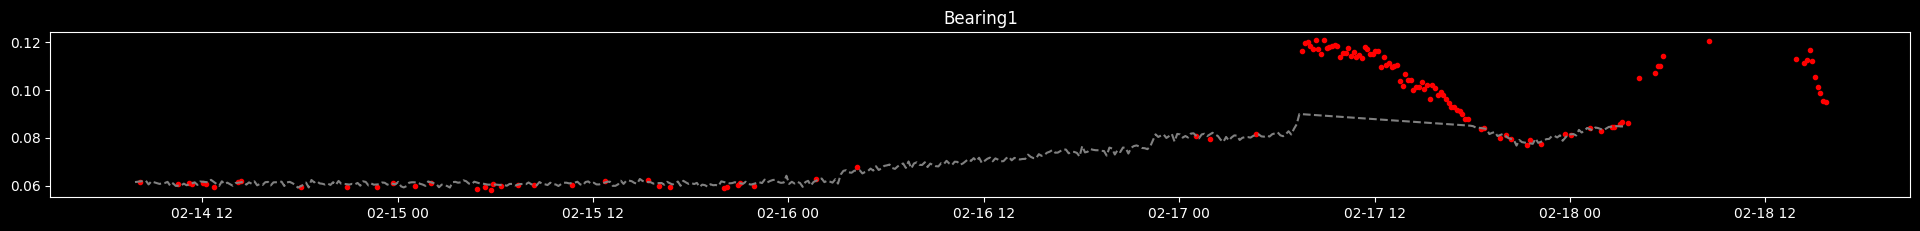

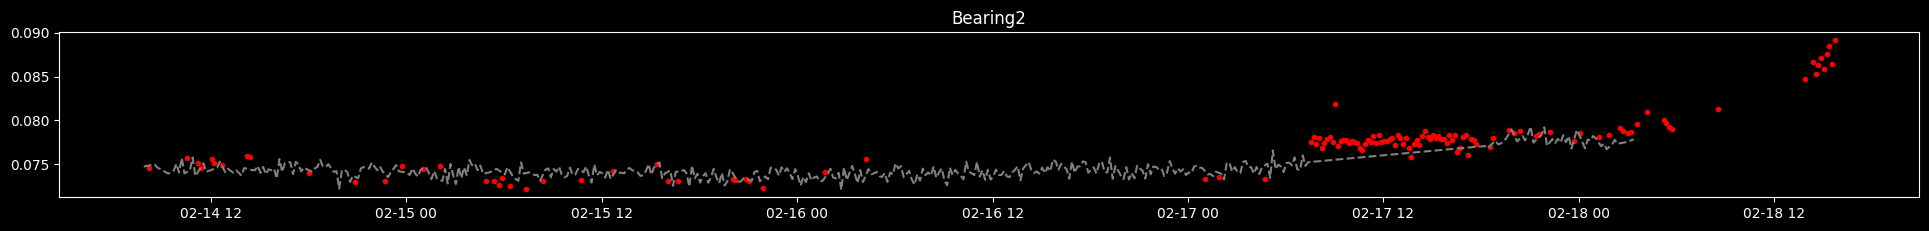

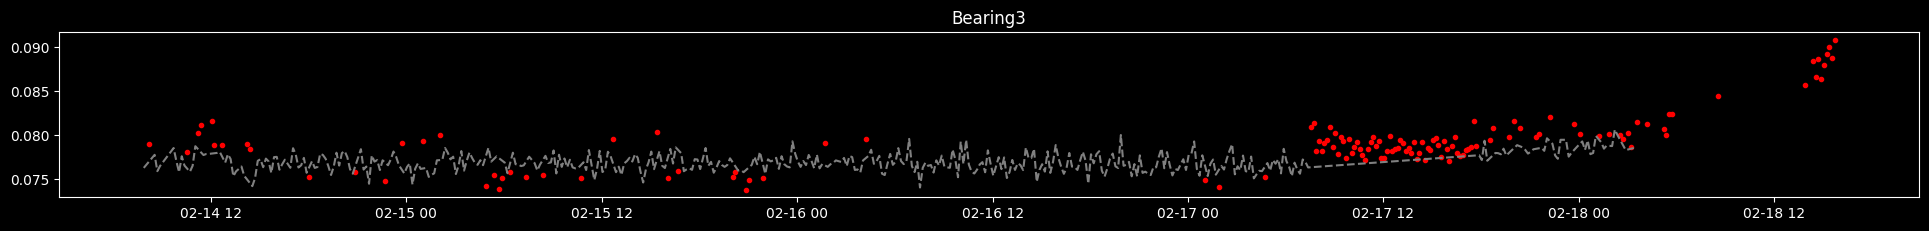

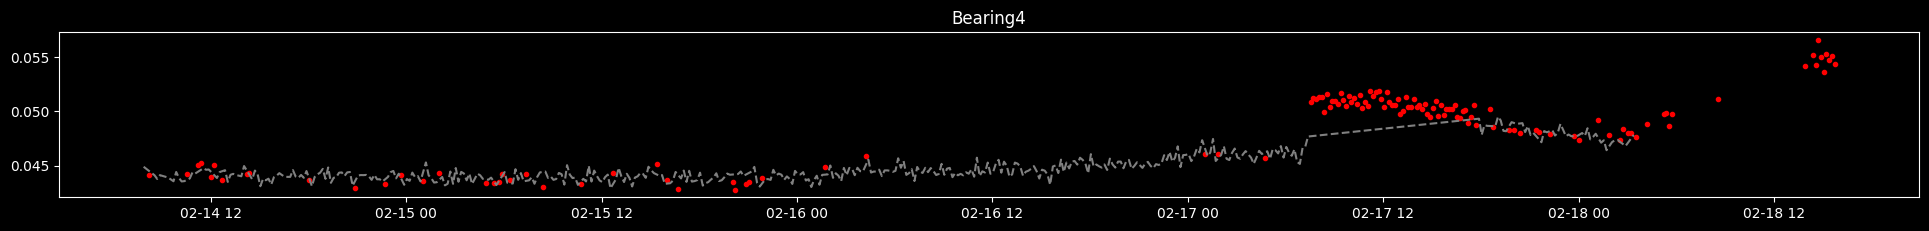

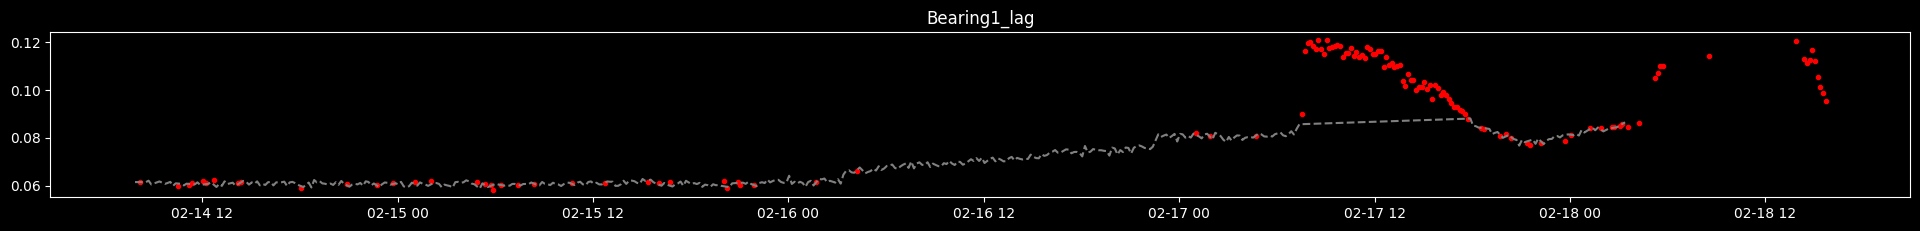

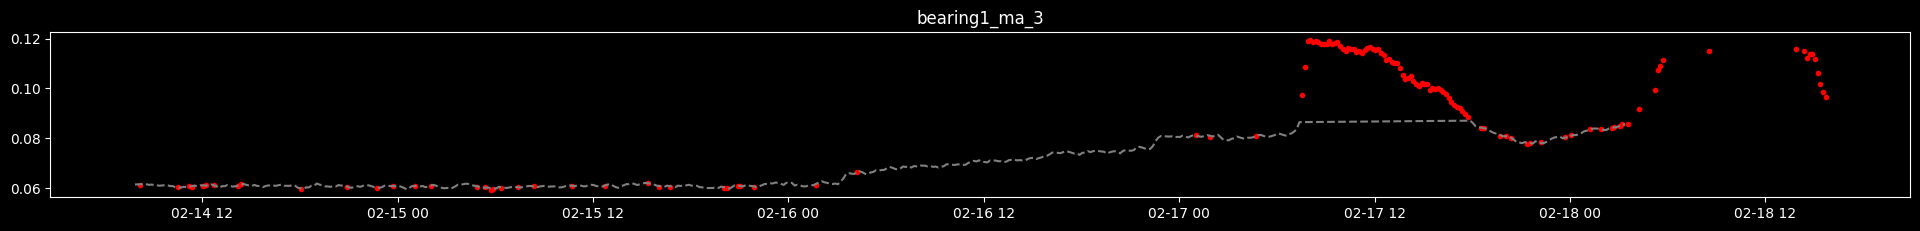

In [61]:
# ▶ Anomaly Points Plot

df_abnormal = df_concat[df_concat['abnormal']==1]
df_normal = df_concat[df_concat['abnormal']==0]

for v, i in  enumerate(df.columns[0:6]) :
  plt.figure(figsize=(24,15))
  plt.subplot(6, 1, v+1)
  plt.plot(df_abnormal.index, df_abnormal[i], 'o', color='red', markersize=3);
  plt.plot(df_normal.index, df_normal[i], linestyle='--', color='grey');
  plt.title(i)